In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask 
import random
import glob
import hdbscan


load one year
(binned dataset as an example)

In [3]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


# for each year (from 1998 to 2022), read in the data (xarray; all data in folder called as year) and smooth as in:
# # smooth ds with a 3 x 3 moving window lungo gli assi x e y e time, riempiendo i valori nulli con la media
# then compute the relative valure (dividing the yearly maximum for each pixel)
# append to a new dataset 

for year in range(1998, 2023):
    print(year)
    # read in the data
    print(path_in + str(year) + '/*.nc')
    ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
    
    # smooth data
    ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean()
    ds_3w = ds_smooth.rolling(time=21, center=True, min_periods=1).mean()
    
    # compute the relative value
    ds_smooth_rel = ds_3w / ds_3w.max(dim='time')
    
    # append to a new dataset
    if year == 1998:
        ds_smooth_rel_tot = ds_smooth_rel
    else:
        ds_smooth_rel_tot = xr.concat([ds_smooth_rel_tot, ds_smooth_rel], dim='time')
        

1998
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/1998/*.nc
1999
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/1999/*.nc
2000
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2000/*.nc
2001
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2001/*.nc
2002
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2002/*.nc
2003
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2003/*.nc
2004
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2004/*.nc
2005
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2005/*.nc
2006
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2006/*.nc
2007
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2007/*.nc
2008
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2008/*.nc
2009
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2009/*.nc
2010
/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2010/*.nc
2011
/mnt/d/Dropbox/R_pro

In [5]:
ds_smooth_rel_tot

<xarray.Dataset>
Dimensions:    (time: 6124, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 1998-03-01 1998-03-02 ... 2022-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(42, 1247, 1056), meta=np.ndarray>

/home/matzuc/miniconda3/envs/geo/lib/python3.9/site-packages/dask/array/reductions.py:640: RuntimeWarning: All-NaN slice encountered
  return np.nanmax(x_chunk, axis=axis, keepdims=keepdims)


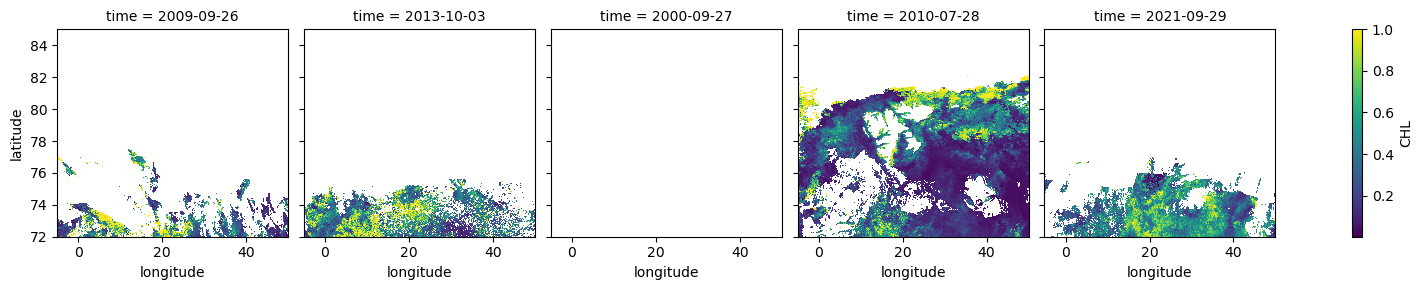

In [6]:
ds_smooth_rel_tot.sel(time=random.sample(list(ds_smooth_rel_tot.time.values), 5)).CHL.plot(col='time', col_wrap=5)


In [7]:
# confronto ds contro lo smoothed
interv = random.sample(list(ds.time.values), 5)
interv

[numpy.datetime64('2022-07-17T00:00:00.000000000'),
 numpy.datetime64('2022-04-28T00:00:00.000000000'),
 numpy.datetime64('2022-06-02T00:00:00.000000000'),
 numpy.datetime64('2022-03-23T00:00:00.000000000'),
 numpy.datetime64('2022-06-19T00:00:00.000000000')]

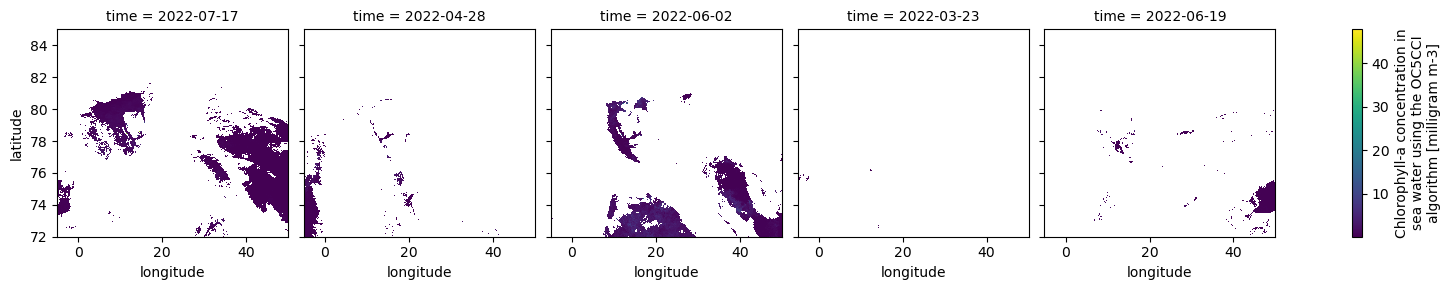

In [8]:
# plotta ds su interv 
ds.sel(time=interv).CHL.plot(col='time', col_wrap=5)

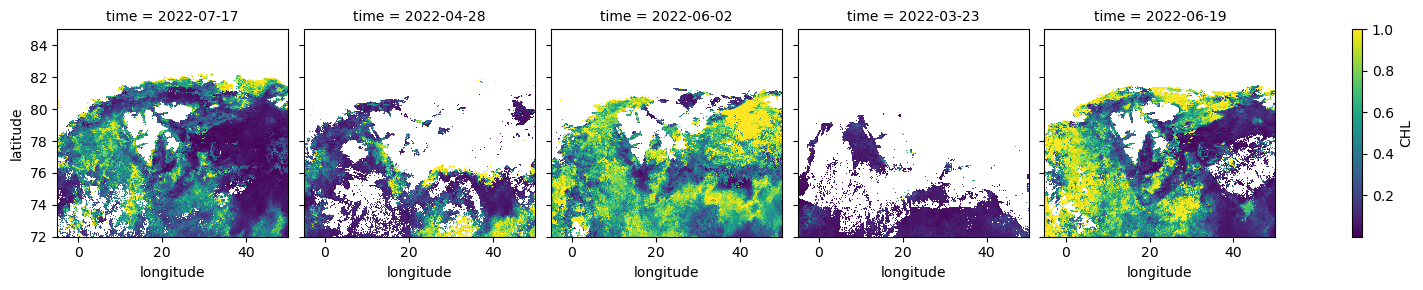

In [9]:
ds_smooth_rel_tot.sel(time=interv).CHL.plot(col='time', col_wrap=5)

In [29]:
ds_smooth_rel_tot

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 6124)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 298 299 300 301 302 303 304
Data variables:
    CHL        (doy, latitude, longitude) float32 dask.array<chunksize=(42, 1247, 1056), meta=np.ndarray>

In [2]:
# aggiungi doy e calcola la media per ogni doy
ds_smooth_rel_tot['doy'] = ds_smooth_rel_tot.time.dt.dayofyear
ds_smooth_rel_totCLIM = ds_smooth_rel_tot.groupby('doy').mean(dim='time')

# scrivi il file
ds_smooth_rel_totCLIM.to_netcdf('daily_smoothed_climatology2.nc')



NameError: name 'ds_smooth_rel_tot' is not defined

In [2]:
# read 'daily_smoothed_climatology2.nc'
ds_smooth_rel_totCLIM = xr.open_dataset('daily_smoothed_climatology2.nc')


In [3]:
ds_smooth_rel_totCLIM

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056, doy: 246)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
  * doy        (doy) int64 60 61 62 63 64 65 66 ... 299 300 301 302 303 304 305
Data variables:
    CHL        (doy, latitude, longitude) float32 ...

In [4]:
# select doy = 153
temp = ds_smooth_rel_totCLIM.sel(doy=90).compute()

temp

<xarray.Dataset>
Dimensions:    (latitude: 1248, longitude: 1056)
Coordinates:
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
    doy        int64 90
Data variables:
    CHL        (latitude, longitude) float32 nan nan nan ... 0.1801 0.1815

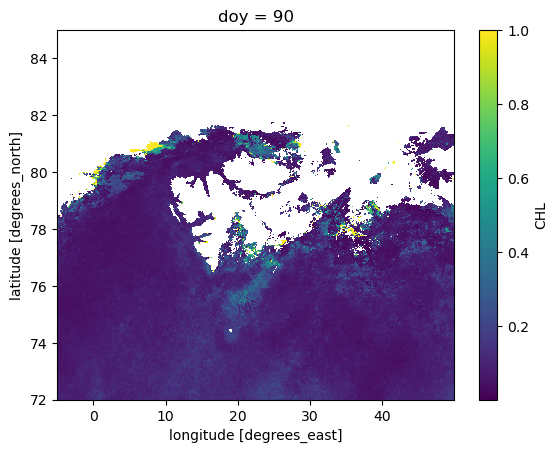

In [5]:
# plot temp
temp.CHL.plot()

In [15]:
#temp as a matrix
t = temp.CHL.values


In [9]:
# Seleziona la variabile CHL
chl_array = ds_smooth_rel_totCLIM['CHL'].compute()

# Trasforma il DataArray in un formato 2D: (num_punti_spaziali, num_doy)
data_2d = chl_array.stack(point=['latitude', 'longitude']).T

# Rimpiazza i valori nulli con 0
data_2d_filled = data_2d.fillna(0)

# Estrai come un array numpy per ulteriori elaborazioni
data_array = data_2d_filled.values

In [10]:
data_array.shape

(1317888, 246)

In [11]:
# Inizializza il clusterer
clusterer = hdbscan.HDBSCAN(min_samples=50, gen_min_span_tree=True)

# Applica il clustering
labels = clusterer.fit_predict(data_array)

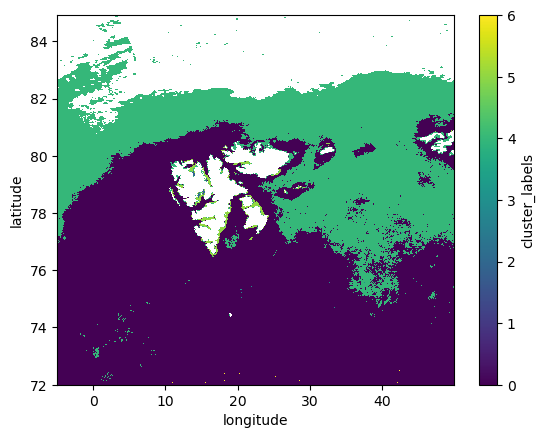

In [14]:
# Assegna le etichette dei cluster al dataset
data_2d_filled['cluster_labels'] = ('point', labels)

# Unstack per ottenere le dimensioni originali (latitude, longitude)
cluster_map = data_2d_filled['cluster_labels'].unstack('point')

# Visualizza la mappa copn colori discreti (non continui)
cluster_map.plot()

In [2]:
from dask.distributed import Client
client = Client() 

import dask.array as da
import xarray as xr

# Carica il tuo dataset come un Dask array
ds_smooth_rel_totCLIM = xr.open_dataset('daily_smoothed_climatology2.nc', chunks={'latitude': 100, 'longitude': 100})

# Estrai la variabile CHL e assicurati che sia un Dask array
chl_array = ds_smooth_rel_totCLIM['CHL'].data

# Assicuriamoci che chl_array sia un Dask array
if not isinstance(chl_array, da.Array):
    chl_array = da.from_array(chl_array, chunks=(246, 100, 100))

# Rimpiazza i NaN con 0
chl_array_filled = da.where(da.isnan(chl_array), 0, chl_array)

# Reshape al formato desiderato
data_2d = chl_array_filled.reshape(chl_array.shape[0], -1).T